In [1]:

#Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #imported Seaborn with the alias sns
import plotly.express as px # library to create a pie chart in Python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import svm,datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold,LeaveOneOut,ShuffleSplit
from sklearn import datasets

In [2]:
df=pd.read_csv(r"C:\Users\nayak\Downloads\cardio_train.csv")
df

id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0                  0;18393;2;168;62.0;110;80;1;1;0;0;1;0                               
1                  1;20228;1;156;85.0;140;90;3;1;0;0;1;1                               
2                  2;18857;1;165;64.0;130;70;3;1;0;0;0;1                               
3                 3;17623;2;169;82.0;150;100;1;1;0;0;1;1                               
4                  4;17474;1;156;56.0;100;60;1;1;0;0;0;0                               
...                                                  ...                               
69995          99993;19240;2;168;76.0;120;80;1;1;1;0;1;0                               
69996         99995;22601;1;158;126.0;140;90;2;2;0;0;1;1                               
69997         99996;19066;2;183;105.0;180;90;3;1;0;1;0;1                               
69998          99998;22431;1;163;72.0;135;80;1;2;0;0;0;1                               
69999          99999;20540;1;170;72.0;120;80;2;1;0;0;1;0                               

[70000 rows x 1 columns]

In [4]:
import pandas as pd

# Define the path to the CSV file
csv_file_path = r"C:\Users\nayak\Downloads\cardio_train.csv"

# Load the CSV file into a DataFrame with the correct delimiter
cardio_df = pd.read_csv(csv_file_path, delimiter=';')

cardio_df

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

In [5]:
cardio_df.shape

(70000, 13)

In [6]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
cardio_df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [8]:
cardio_df.tail()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0

In [9]:
cardio_df_cleaned=cardio_df.dropna()
cardio_df_cleaned

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

In [10]:
cardio_df_cleaned.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
cardio_df_cleaned['active'].value_counts()

active
1    56261
0    13739
Name: count, dtype: int64

In [12]:
# Description
cardio_df_cleaned.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

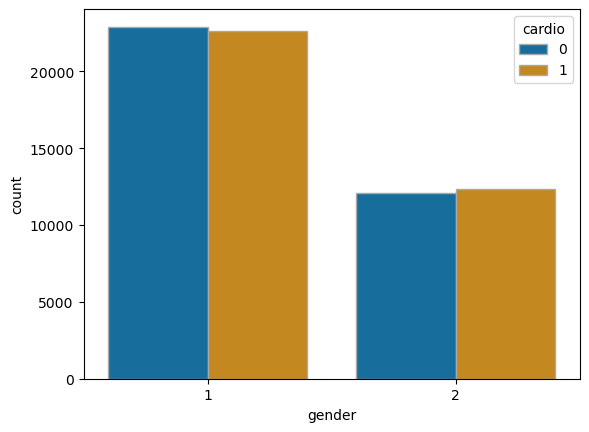

In [13]:
sns.countplot(x='gender', hue='cardio', data=cardio_df_cleaned, palette='colorblind', edgecolor='darkgray')

# Show the plot
plt.show()

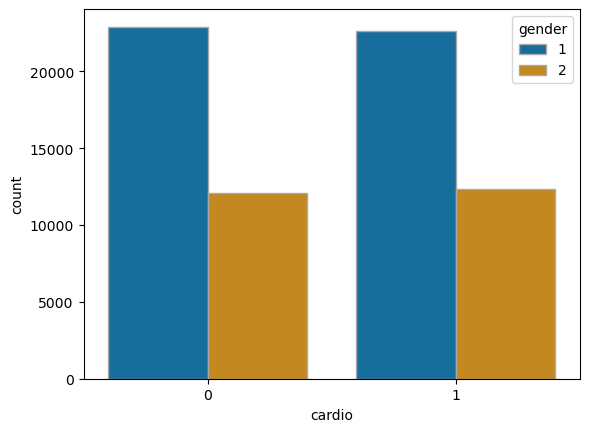

In [14]:
sns.countplot(x='cardio', hue='gender', data=cardio_df_cleaned, palette='colorblind', edgecolor='darkgray')

# Show the plot
plt.show()

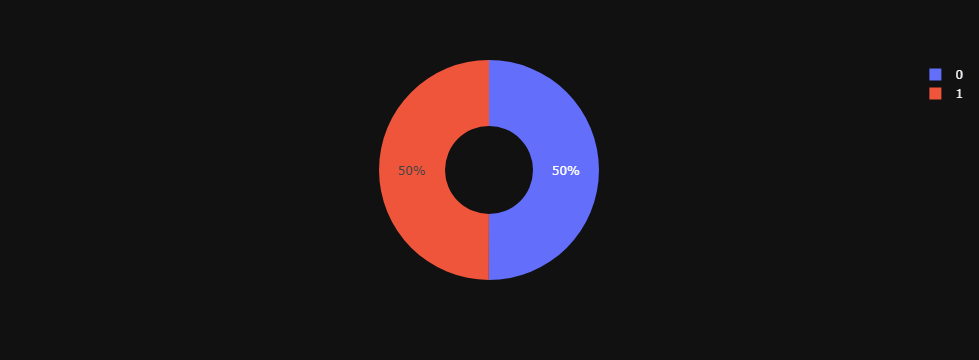

In [15]:
#generates a pie chart from the "cardio" column of your DataFrame
fig = px.pie(cardio_df_cleaned,names="cardio",hole = 0.4,template = "plotly_dark")
fig.show()

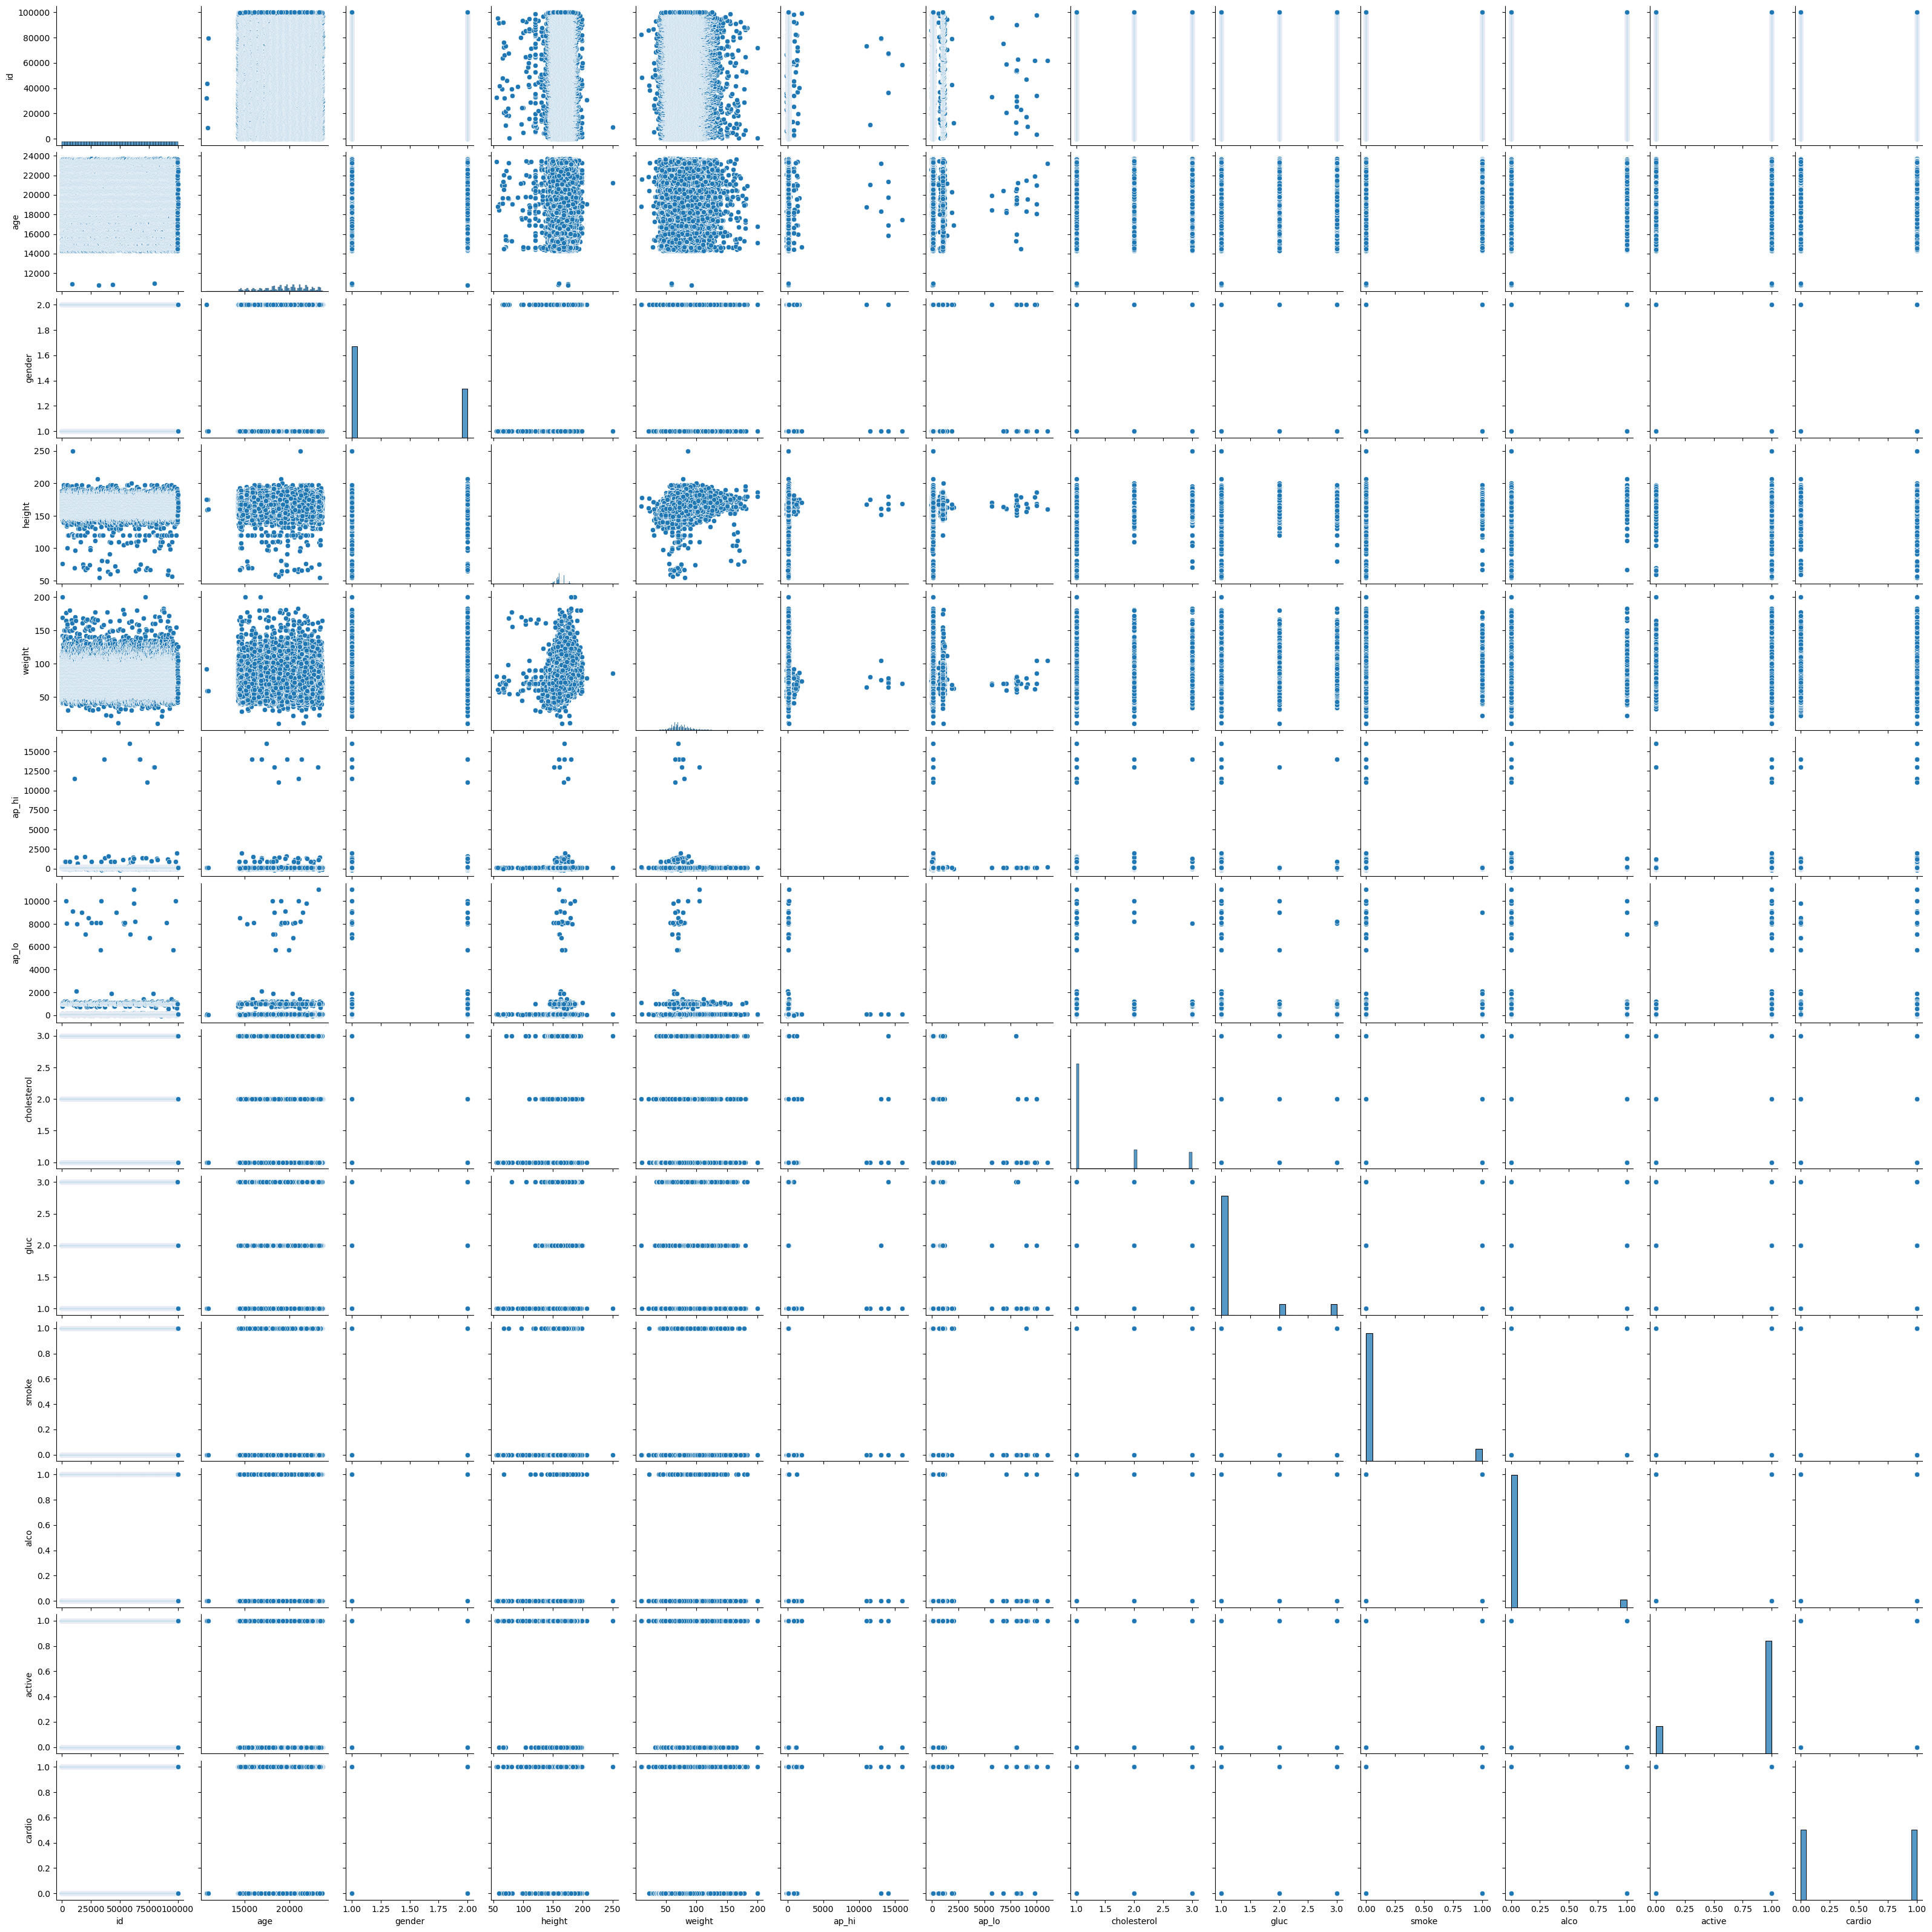

In [16]:

#used to create a pair plot & histograms for each variable along the diagonal
#each pair of numerical variables will show
sns.pairplot(cardio_df_cleaned)

<Axes: >

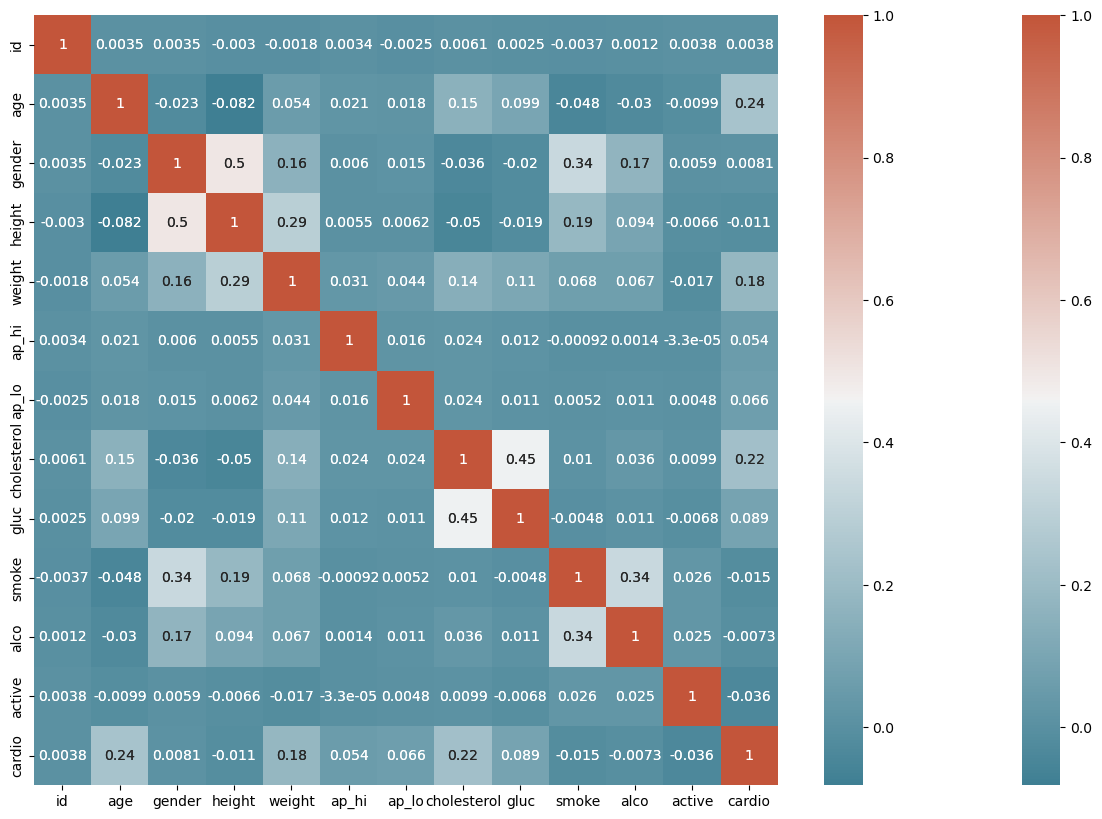

In [17]:
corr = cardio_df_cleaned.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))
     

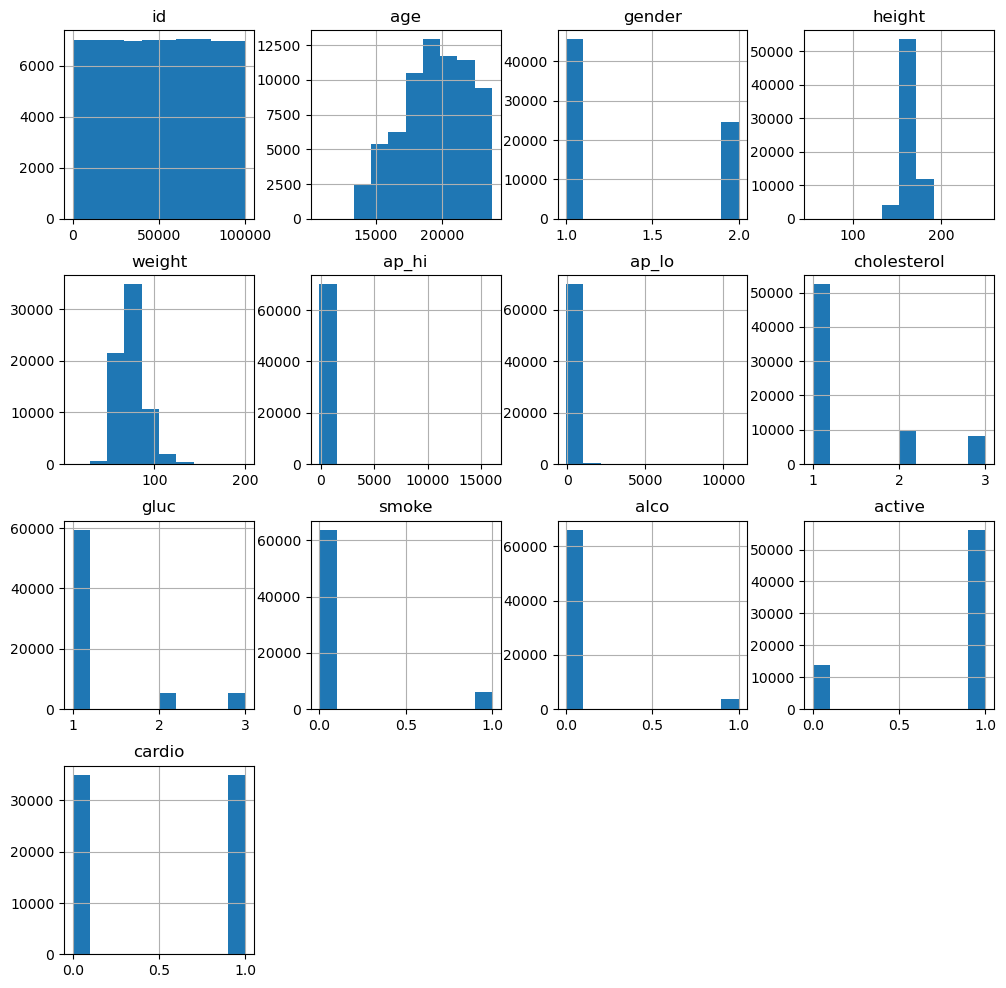

In [18]:
cardio_df_cleaned.hist(figsize=(12,12))
plt.savefig('featuresplot')

In [19]:
# Filtering data by positive Heart Disease patient
pos_data = cardio_df_cleaned[cardio_df_cleaned['active']==1]
pos_data.describe()

id           age        gender        height        weight  \
count  56261.000000  56261.000000  56261.000000  56261.000000  56261.000000   
mean   50025.957573  19456.762127      1.350954    164.332575     74.085702   
std    28830.055017   2464.902819      0.477273      8.165544     14.369657   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25074.000000  17643.000000      1.000000    159.000000     65.000000   
50%    50019.000000  19698.000000      1.000000    165.000000     72.000000   
75%    74940.000000  21315.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  56261.000000  56261.000000  56261.000000  56261.000000  56261.000000   
mean     128.814774     97.075630      1.370203      1.224543      0.091751   
std      148.164321    190.076954      0.683920      0.570802      0.288677   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    14020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco   active        cardio  
count  56261.000000  56261.0  56261.000000  
mean       0.056611      1.0      0.490891  
std        0.231100      0.0      0.499921  
min        0.000000      1.0      0.000000  
25%        0.000000      1.0      0.000000  
50%        0.000000      1.0      0.000000  
75%        0.000000      1.0      1.000000  
max        1.000000      1.0      1.000000

In [20]:
# Filtering data by negative Heart Disease patient
neg_data = cardio_df_cleaned[cardio_df_cleaned['active']==0]
neg_data.describe()

id           age        gender        height        weight  \
count  13739.000000  13739.000000  13739.000000  13739.000000  13739.000000   
mean   49753.183929  19518.430235      1.343911    164.468375     74.697038   
std    28938.165314   2476.319780      0.475029      8.389637     14.492310   
min        2.000000  14282.000000      1.000000     59.000000     32.000000   
25%    24695.000000  17778.000000      1.000000    159.000000     65.000000   
50%    49878.000000  19721.000000      1.000000    165.000000     72.000000   
75%    74660.500000  21393.000000      2.000000    170.000000     83.000000   
max    99998.000000  23692.000000      2.000000    198.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  13739.000000  13739.000000  13739.000000  13739.000000  13739.000000   
mean     128.827571     94.807264      1.353228      1.234297      0.073295   
std      175.945649    181.750110      0.664863      0.578199      0.260630   
min     -120.000000      0.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      1.000000      1.000000      0.000000   
max    16020.000000   8099.000000      3.000000      3.000000      1.000000   

               alco   active        cardio  
count  13739.000000  13739.0  13739.000000  
mean       0.042143      0.0      0.535774  
std        0.200922      0.0      0.498737  
min        0.000000      0.0      0.000000  
25%        0.000000      0.0      0.000000  
50%        0.000000      0.0      1.000000  
75%        0.000000      0.0      1.000000  
max        1.000000      0.0      1.000000

In [21]:
print("(Positive Patients ST depression): " + str(pos_data['active'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['active'].mean()))
     

(Positive Patients ST depression): 1.0
(Negative Patients ST depression): 0.0


In [22]:
print("(Positive Patients thalach): " + str(pos_data['cardio'].mean()))
print("(Negative Patients thalach): " + str(neg_data['cardio'].mean()))

(Positive Patients thalach): 0.4908906702689252
(Negative Patients thalach): 0.5357740738044982


In [23]:
x=cardio_df_cleaned.iloc[:,:-1]
x

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  
0          0     0       1  
1          0     0       1  
2          0     0       0  
3          0     0       1  
4          0     0       0  
...      ...   ...     ...  
69995      1     0       1  
69996      0     0       1  
69997      0     1       0  
69998      0     0       0  
69999      0     0       1  

[70000 rows x 12 columns]

In [24]:
y=cardio_df_cleaned.iloc[:,12:]
y

cardio
0           0
1           1
2           1
3           1
4           0
...       ...
69995       0
69996       1
69997       1
69998       1
69999       0

[70000 rows x 1 columns]

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=30,random_state=1)

In [26]:
xtrain

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
57578  82172  23090       2     170    70.0    120     80            1     1   
17147  24505  21484       1     165    68.0    120     80            1     1   
50504  72082  18976       1     168    72.0    120     90            1     1   
61868  88347  22571       1     155    54.0    150    100            1     1   
52359  74680  19002       2     170    62.0    120     80            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
49100  70099  21289       2     175    78.0    120     80            1     1   
20609  29410  19116       1     164    68.0    120     80            1     1   
21440  30634  18049       2     178    82.0    120     80            1     1   
50057  71447  21957       1     169    77.0    120     80            1     1   
5192    7386  20671       1     174    65.0    160     90            2     2   

       smoke  alco  active  
57578      0     0       1  
17147      0     0       0  
50504      0     0       1  
61868      0     0       0  
52359      0     0       1  
...      ...   ...     ...  
49100      0     0       1  
20609      0     0       0  
21440      0     0       1  
50057      0     0       0  
5192       0     0       1  

[69970 rows x 12 columns]

In [27]:
ytrain

cardio
57578       1
17147       0
50504       0
61868       1
52359       1
...       ...
49100       1
20609       0
21440       0
50057       1
5192        1

[69970 rows x 1 columns]

In [28]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
     


In [29]:

Lgf=LogisticRegression()
Lgf.fit(xtrain,ytrain)
     

C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [30]:
y_pred1 = Lgf.predict(xtest) # get y predictions
print(classification_report(ytest, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.79      0.79      0.79        14

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



In [31]:
logscore=Lgf.score(xtest,ytest)
logscore

0.8

In [32]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [33]:
Rclf=RandomForestClassifier()
Rclf.fit(xtrain,ytrain)

C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

In [34]:
y_pred6 = Rclf.predict(xtest) # get y predictions
print(classification_report(ytest, y_pred6))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.80      0.86      0.83        14

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



In [35]:
randscore=Rclf.score(xtest,ytest)
randscore

0.8333333333333334

In [36]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
Clf=DecisionTreeClassifier()
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [37]:
y_pred5 = Clf.predict(xtest) # get y predictions
print(classification_report(ytest, y_pred5))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.73      0.79      0.76        14

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30



In [38]:

descore=Clf.score(xtest,ytest)

[Text(0.5957939139430924, 0.9912280701754386, 'x[5] <= 129.5\ngini = 0.5\nsamples = 69970\nvalue = [35005, 34965]'),
 Text(0.38547574992946576, 0.9736842105263158, 'x[1] <= 19960.5\ngini = 0.434\nsamples = 41309\nvalue = [28145.0, 13164.0]'),
 Text(0.4906348319362791, 0.9824561403508771, 'True  '),
 Text(0.22645401652987565, 0.956140350877193, 'x[7] <= 2.5\ngini = 0.364\nsamples = 25474\nvalue = [19384, 6090]'),
 Text(0.11825370821422271, 0.9385964912280702, 'x[1] <= 16099.5\ngini = 0.348\nsamples = 24389\nvalue = [18926, 5463]'),
 Text(0.048815434376347076, 0.9210526315789473, 'x[7] <= 1.5\ngini = 0.241\nsamples = 6728\nvalue = [5784, 944]'),
 Text(0.031518058393694356, 0.9035087719298246, 'x[5] <= 114.5\ngini = 0.218\nsamples = 6069\nvalue = [5312, 757]'),
 Text(0.014854755150472238, 0.8859649122807017, 'x[8] <= 1.5\ngini = 0.157\nsamples = 2574\nvalue = [2353, 221]'),
 Text(0.009031976873988514, 0.868421052631579, 'x[4] <= 68.5\ngini = 0.148\nsamples = 2434\nvalue = [2238, 196]'),
 

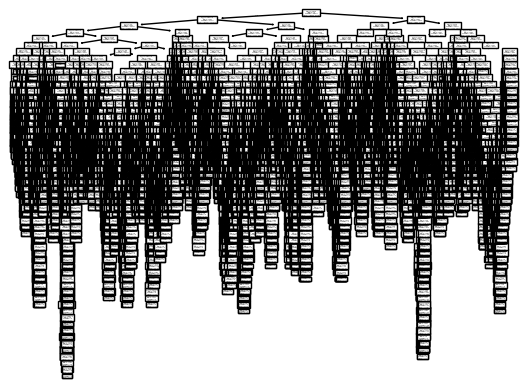

In [39]:
from sklearn import tree
tree.plot_tree(Clf)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=5)

In [42]:
knn.fit(xtrain,ytrain)

C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [43]:
y_pred2 = knn.predict(xtest) # get y predictions
print(classification_report(ytest, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.67      0.57      0.62        14

    accuracy                           0.67        30
   macro avg       0.67      0.66      0.66        30
weighted avg       0.67      0.67      0.66        30



In [44]:

knnscore=knn.score(xtest,ytest)
knnscore

0.6666666666666666

In [45]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report
Svcf=SVC()
Svcf.fit(xtrain,ytrain)

C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC()

In [46]:
y_pred3 = Svcf.predict(xtest) # get y predictions
print(classification_report(ytest, y_pred3))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        16
           1       0.50      0.50      0.50        14

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.53        30
weighted avg       0.53      0.53      0.53        30



In [47]:
svcscore=Svcf.score(xtest,ytest)

In [48]:
models = pd.DataFrame({
    "model" : ["Logistic Regression",
               "Decision Tree",
               "Random Forest",
               "KNN",
               "SVM",
               ],
    "Accuracy Score" : [ logscore, descore ,
                          randscore ,knnscore ,
                          svcscore ]

})

models

model  Accuracy Score
0  Logistic Regression        0.800000
1        Decision Tree        0.766667
2        Random Forest        0.833333
3                  KNN        0.666667
4                  SVM        0.533333

model  Accuracy Score
2        Random Forest        0.833333
0  Logistic Regression        0.800000
1        Decision Tree        0.766667
3                  KNN        0.666667
4                  SVM        0.533333

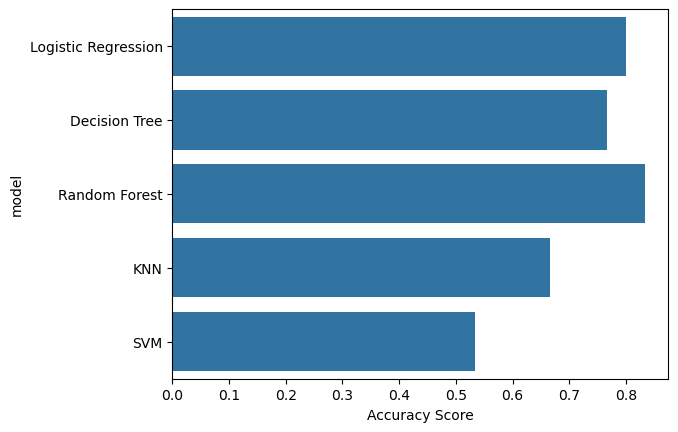

In [49]:
sns.barplot(x="Accuracy Score", y= "model",data = models)
models.sort_values(by = "Accuracy Score",ascending = False)

In [51]:
#;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
#example to enter below
#14532;2;181;95.0;130;90;1;1;1;1;0;0
v1=int(input("Enter age vlaue  :"))
v1


     

Enter age vlaue  : 13234


13234

In [52]:
v2=int(input("Enter gender vlaue :"))
v2

Enter gender vlaue : 1


1

In [53]:
v3=float(input("Enter height vlaue  :"))
v3

Enter height vlaue  : 123


123.0

In [54]:
v4=float(input("Enter weight vlaue  :"))
v4


Enter weight vlaue  : 23


23.0

In [55]:
v5=float(input("Enter ap_hi vlaue  :"))
v5

Enter ap_hi vlaue  : 1


1.0

In [56]:
v6=float(input("Enter ap_lo vlaue  :"))
v6

Enter ap_lo vlaue  : 1


1.0

In [57]:
v7=int(input("Enter cholesterol vlaue :"))
v7

Enter cholesterol vlaue : 1


1

In [58]:
v8=int(input("Enter gluc vlaue :"))
v8


Enter gluc vlaue : 1


1

In [59]:
v9=int(input("Enter smoke vlaue :"))
v9

Enter smoke vlaue : 1


1

In [60]:
v10=int(input("Enter alco vlaue :"))
v10

Enter alco vlaue : 1


1

In [61]:
v11=int(input("Enter active vlaue :"))
v11

Enter active vlaue : 1


1

In [62]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Represent the RandomForestClassifier with specified hyperparameters
model_rf = RandomForestClassifier(max_depth = 14 , random_state = 11,n_estimators=30)

# Train the RandomForest model
model_rf.fit(x_train,y_train)

C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=14, n_estimators=30, random_state=11)

In [63]:
#predictions on the test set
pred_rf = model_rf.predict(x_test)
accuracy_score_rf = accuracy_score(y_test , pred_rf)
accuracy_score_rf*100

73.18571428571428

In [64]:
#confussion matrix
cm3 = confusion_matrix(y_test,pred_rf)
cm3
# 367 correct classifed as 0 and 35 is wrong classifed as 0
# 169 correct classifed as 1 and 85 is wrong classifed as 1

array([[5424, 1576],
       [2178, 4822]], dtype=int64)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, y_pred6)
print(cm)
accuracy_score(ytest, y_pred6)

[[13  3]
 [ 2 12]]


0.8333333333333334

In [66]:
importance = Rclf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.18386
Feature: 1, Score: 0.21901
Feature: 2, Score: 0.01411
Feature: 3, Score: 0.11982
Feature: 4, Score: 0.13257
Feature: 5, Score: 0.17579
Feature: 6, Score: 0.07884
Feature: 7, Score: 0.03614
Feature: 8, Score: 0.01498
Feature: 9, Score: 0.00739
Feature: 10, Score: 0.00639
Feature: 11, Score: 0.01110


<Axes: >

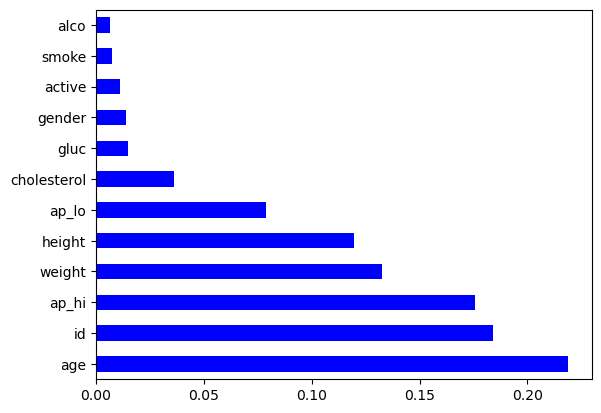

In [67]:
index= cardio_df_cleaned.columns[:-1]
importance = pd.Series(Rclf.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')